# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from collections import Counter

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
            
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
lilcities = ['castro', 'viedma', 'taolanaro', 'hilo', 'rikitea', 'yellowknife']
found_cities = []
latitude = [] 
longitude = []
humidity = []
temperature = []
cloudiness = []
wind_speed = []

dumped_cities = []

# For temperature in Farenheit
units = "&units=imperial"

for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?q="
    query_url = url + city + units + "&appid=" + weather_api_key
    try:
        response = requests.get(query_url).json()
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        temperature.append(response['main']['temp_max'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        found_cities.append(city)
    except:
        dumped_cities.append(city)

In [47]:
print(f"The original list included {len(cities)} cities.")
print(f"Of those cities, {len(found_cities)} were found in the OpenWeather API and {len(dumped_cities)} were not found.")

The original list included 635 cities.
Of those cities, 579 were found in the OpenWeather API and 56 were not found.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data = pd.DataFrame({
    "City": found_cities,
    "Latitude": latitude,
    "Longitude": longitude,
    "Humidity": humidity,
    "Max Temperature": temperature,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
            })

In [ ]:
city_data.to_csv("Output/fileOne.csv", index=False, header=True)

In [48]:
city_data["City"] = city_data["City"].str.title() 
city_data.head()

,City,Latitude,Longitude,Humidity,Max Temperature,Cloudiness,Wind Speed
0,Avarua,-21.2078,-159.7750,88,77.00,1,2.30
1,Lavrentiya,65.5833,-171.0000,83,-10.77,0,6.53
2,Carnarvon,-24.8667,113.6333,100,78.80,40,12.66
3,Erzin,36.9559,36.2000,72,59.00,40,12.66
4,Ushuaia,-54.8000,-68.3000,55,59.00,0,13.80


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [31]:
#  Get the indices of cities that have humidity over 100%.
high_humidity = city_data.loc[city_data["Humidity"] > 100]
high_humidity

,City,Latitude,Longitude,Humidity,Max Temperature,Cloudiness,Wind Speed


In [8]:
print("There are no cities with humidity over 100%")

There are no cities with humidity over 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

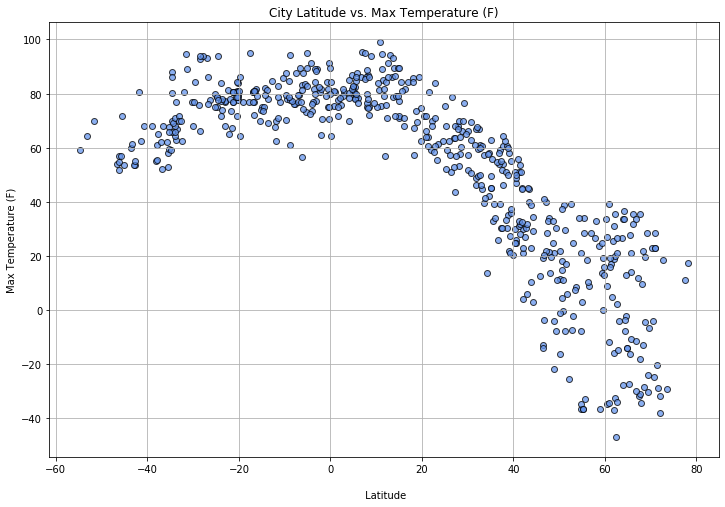

In [10]:
plt.figure(figsize=(12, 8))
plt.scatter(city_data["Latitude"], city_data["Max Temperature"], marker="o", facecolors="cornflowerblue", \
            cmap=city_data["Max Temperature"], edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Max Temperature (F)")
plt.xlabel("\n Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

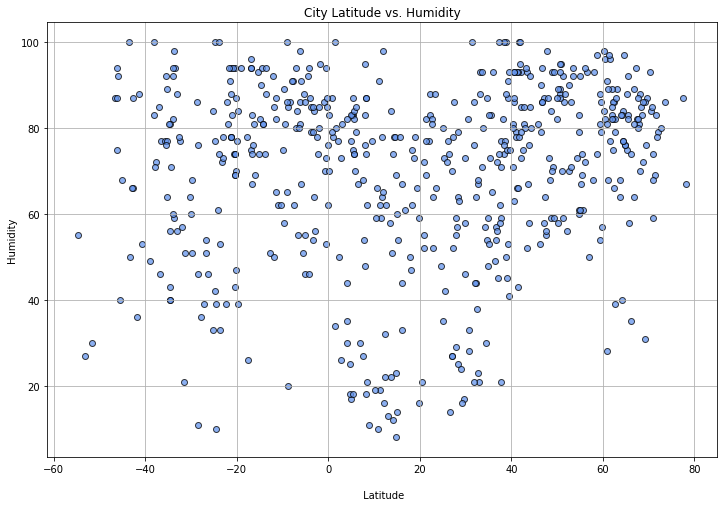

In [11]:
plt.figure(figsize=(12, 8))
plt.scatter(city_data["Latitude"], city_data["Humidity"], marker="o", facecolors="cornflowerblue", \
            cmap=city_data["Humidity"], edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Humidity")
plt.xlabel("\n Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

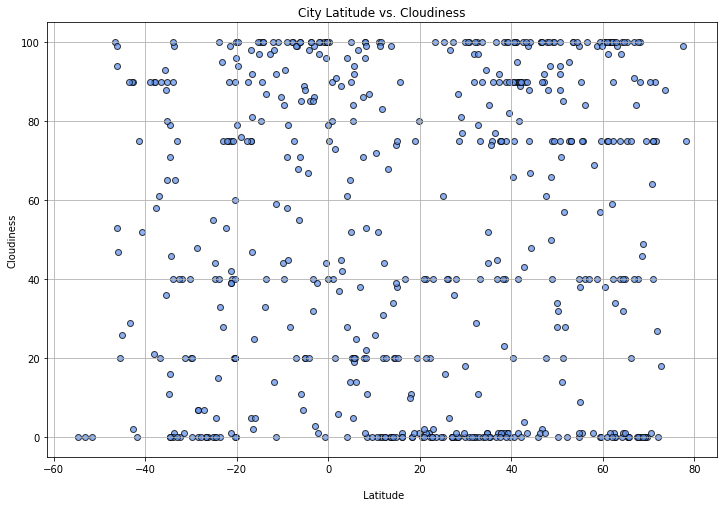

In [12]:
plt.figure(figsize=(12, 8))
plt.scatter(city_data["Latitude"], city_data["Cloudiness"], marker="o", facecolors="cornflowerblue", \
            cmap=city_data["Cloudiness"], edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("\n Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

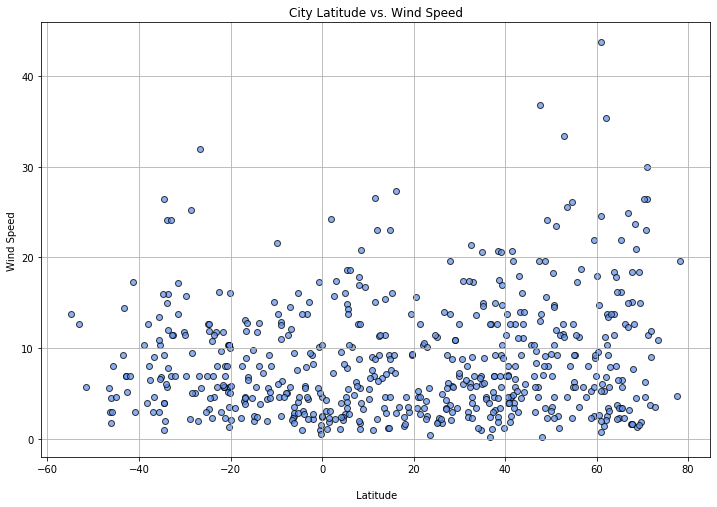

In [13]:
plt.figure(figsize=(12, 8))
plt.scatter(city_data["Latitude"], city_data["Wind Speed"], marker="o", facecolors="cornflowerblue", \
            cmap=city_data["Wind Speed"], edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("\n Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.show()

## Linear Regression

In [14]:
# Setting variables for the Southern and Northern Hemispheres
southern = city_data.loc[city_data["Latitude"] < 0.0]
northern = city_data.loc[city_data["Latitude"] > 0.0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8665964210204333


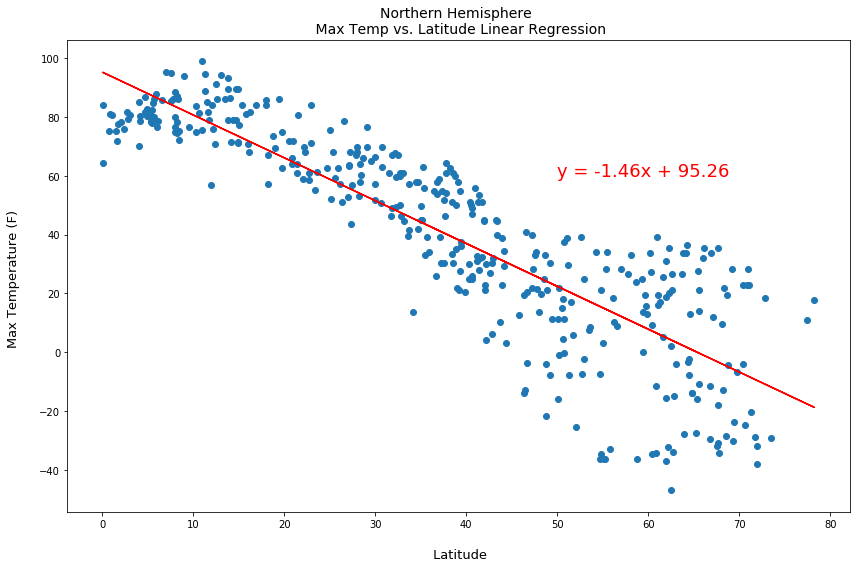

In [25]:
x_values = northern["Latitude"]
y_values = northern["Max Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(12, 8))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,60),fontsize=18,color="red")
plt.xlabel(" \n Latitude", fontsize=13)
plt.ylabel("Max Temperature (F) \n ", fontsize=13)
plt.title("Northern Hemisphere \n Max Temp vs. Latitude Linear Regression", fontsize=14)
plt.tight_layout()

print(f"The r-value is: {rvalue}")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5533493394450145


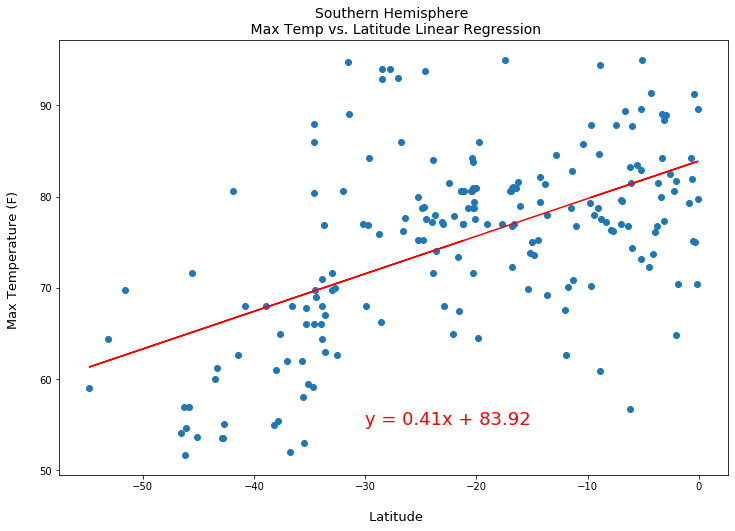

In [32]:
x_values = southern["Latitude"]
y_values = southern["Max Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(12, 8))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30, 55),fontsize=18,color="red")
plt.xlabel(" \n Latitude", fontsize=13)
plt.ylabel("Max Temperature (F) \n ", fontsize=13)
plt.title("Southern Hemisphere \n Max Temp vs. Latitude Linear Regression", fontsize=14)

print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3667729656910251


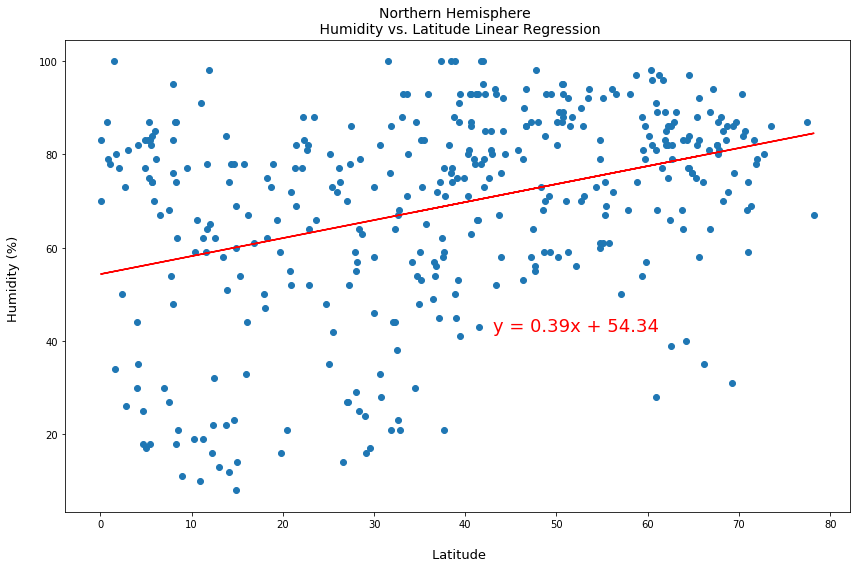

In [35]:
x_values = northern["Latitude"]
y_values = northern["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(12, 8))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(43,42),fontsize=18,color="red")
plt.xlabel(" \n Latitude", fontsize=13)
plt.ylabel("Humidity (%) \n ", fontsize=13)
plt.title("Northern Hemisphere \n Humidity vs. Latitude Linear Regression", fontsize=14)
plt.tight_layout()

print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.20609460235407911


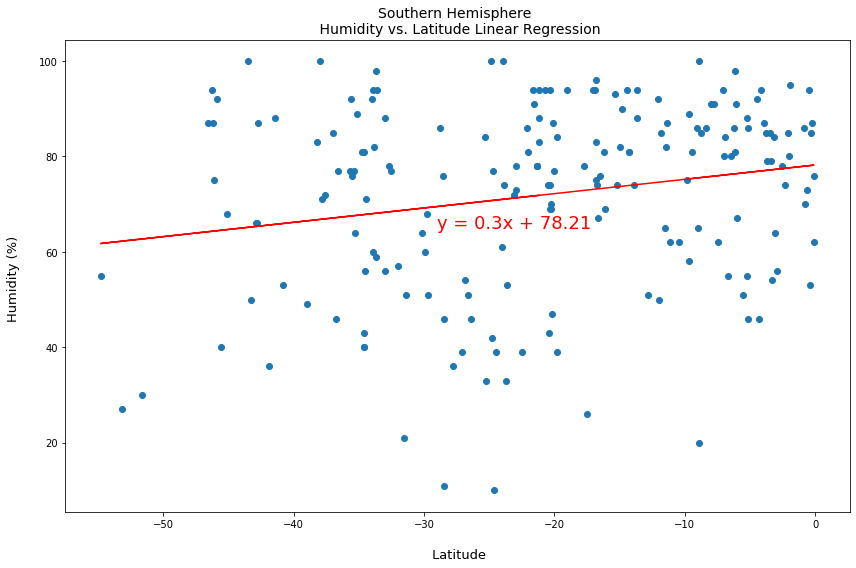

In [38]:
x_values = southern["Latitude"]
y_values = southern["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(12, 8))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-29,65),fontsize=18,color="red")
plt.xlabel(" \n Latitude", fontsize=13)
plt.ylabel("Humidity (%) \n ", fontsize=13)
plt.title("Southern Hemisphere \n Humidity vs. Latitude Linear Regression", fontsize=14)
plt.tight_layout()

print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.13474478710956542


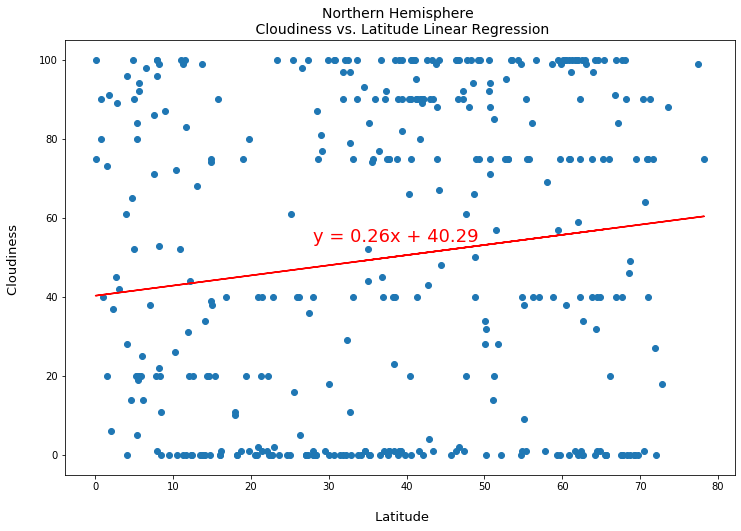

In [42]:
x_values = northern["Latitude"]
y_values = northern["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(12, 8))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(28, 54),fontsize=18,color="red")
plt.xlabel(" \n Latitude", fontsize=13)
plt.ylabel("Cloudiness \n ", fontsize=13)
plt.title("Northern Hemisphere \n Cloudiness vs. Latitude Linear Regression", fontsize=14)

print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2605823398042117


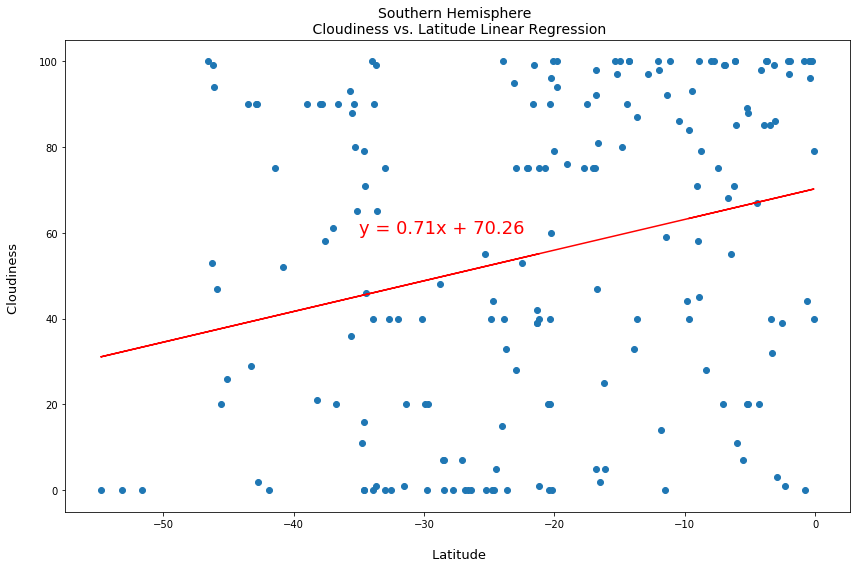

In [20]:
x_values = southern["Latitude"]
y_values = southern["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(12, 8))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,60),fontsize=18,color="red")
plt.xlabel(" \n Latitude", fontsize=13)
plt.ylabel("Cloudiness \n ", fontsize=13)
plt.title("Southern Hemisphere \n Cloudiness vs. Latitude Linear Regression", fontsize=14)
plt.tight_layout()

print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.16526397257380848


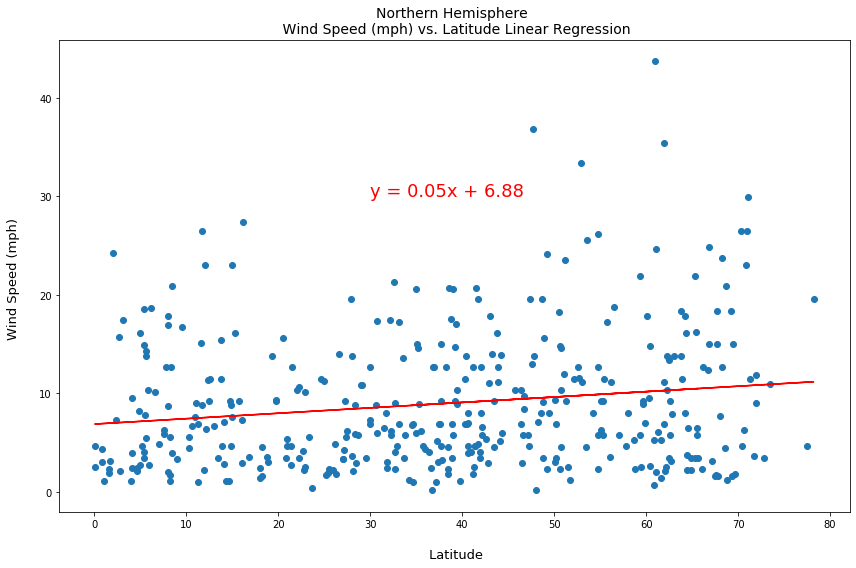

In [45]:
x_values = northern["Latitude"]
y_values = northern["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(12, 8))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,30), fontsize=18,color="red")
plt.xlabel(" \n Latitude", fontsize=13)
plt.ylabel("Wind Speed (mph) \n ", fontsize=13)
plt.title("Northern Hemisphere \n Wind Speed (mph) vs. Latitude Linear Regression", fontsize=14)
plt.tight_layout()

print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.16112723286199404


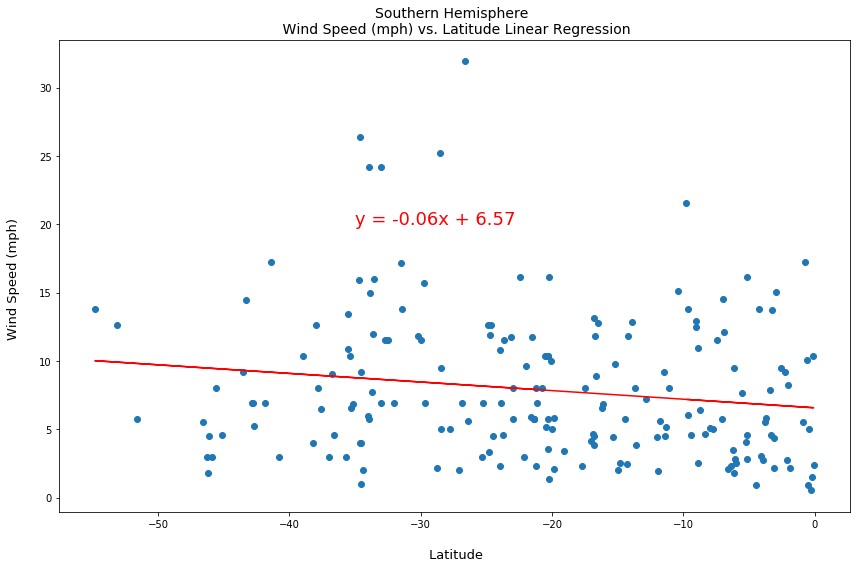

In [46]:
x_values = southern["Latitude"]
y_values = southern["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(12, 8))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,20),fontsize=18,color="red")
plt.xlabel(" \n Latitude", fontsize=13)
plt.ylabel("Wind Speed (mph) \n ", fontsize=13)
plt.title("Southern Hemisphere \n Wind Speed (mph) vs. Latitude Linear Regression", fontsize=14)
plt.tight_layout()

print(f"The r-value is: {rvalue}")
plt.show()